In [54]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

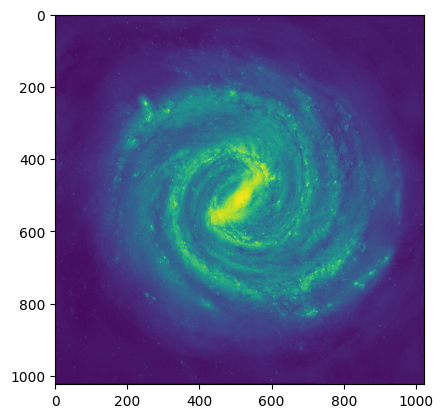

(1024, 1024)


In [55]:
img_path = "/content/milky-way.jpg"

img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

plt.imshow(img)
plt.show()

print(img.shape)

In [56]:
k = 2 # Number cluster
m = 2 # Parameter fuzzy

# Initialize centroids
C = np.random.randint(0, 255, size=k)
print("Centroid : ",C)

nb_pixels = img.size
print(nb_pixels)
img_flatten = img.flatten().astype('float')

# Initialize matrix of membership
U = np.random.rand(k, nb_pixels)
U = U / U.sum(axis=0) # The sum of each column equal 1
print("Membership: ", U)

Centroid :  [135  86]
1048576
Membership:  [[0.75142151 0.52430671 0.18558337 ... 0.53057014 0.82388763 0.72730538]
 [0.24857849 0.47569329 0.81441663 ... 0.46942986 0.17611237 0.27269462]]


In [57]:
def update_centroids(membership, centroids, img_flatten, m):
  """
  membership : matrix of size k x number_pixel
  centroids : old centroids avec k points
  """
  k = centroids.shape[0]
  centroids = np.dot(membership**m, img_flatten) / np.sum(membership**m,axis=1)

  return centroids

In [58]:
def update_membership(centroids, img_flatten, m):
  C_new, pixels_new = np.meshgrid(centroids, img_flatten)
  power = 2 / (m-1)
  p1 = np.abs(C_new - pixels_new)**power
  p2 = np.sum((1./np.abs(C_new - pixels_new))**power,axis=1)

  membership = np.transpose(1./(p1*p2[:,None]))
  return membership


In [59]:
def cluster_image(U, C, img, m, epsilon, max_iter):
  d = 1
  i = 0 # Number of iteration
  img_flatten = img.flatten().astype('float')
  while d > epsilon:
    C = update_centroids(U, C, img_flatten, m) # Update centroids

    old_u = np.copy(U)
    U = update_membership(C, img_flatten, m) # Update memberships
    d = np.sum(abs(U - old_u))

    print("Iteration %d : cost = %f" %(i, d))
    i+=1
    if d < epsilon or i > max_iter:
      break

  cluster_membership = np.argmax(U, axis=0)

  result = cluster_membership.reshape(img.shape).astype('int')
  return result



In [60]:
epsilon, max_iter = 0.00001, 1000
k = 4 # Number cluster
m = 2 # Parameter fuzzy

# Initialize centroids
C = np.random.randint(0, 255, size=k)
print("Centroid : ",C)

nb_pixels = img.size

img_flatten = img.flatten().astype('float')

# Initialize matrix of membership
U = np.random.rand(k, nb_pixels)
U = U / U.sum(axis=0) # The sum of each column equal 1
print("Membership: ", U)

result = cluster_image(U, C, img, m, epsilon, max_iter)

print(result.shape)

Centroid :  [110 215 168  11]
Membership:  [[0.43501267 0.28524615 0.37260454 ... 0.41870967 0.2643818  0.36720007]
 [0.03959098 0.25991687 0.21370542 ... 0.3325346  0.19265234 0.06640043]
 [0.36055437 0.33605269 0.24546758 ... 0.00711385 0.28091793 0.4542964 ]
 [0.16484199 0.11878429 0.16822247 ... 0.24164187 0.26204793 0.1121031 ]]
Iteration 0 : cost = 474036.351364
Iteration 1 : cost = 7107.424379
Iteration 2 : cost = 30938.798498
Iteration 3 : cost = 97251.920378
Iteration 4 : cost = 247441.585681
Iteration 5 : cost = 487910.407745
Iteration 6 : cost = 637071.534844
Iteration 7 : cost = 464698.342743
Iteration 8 : cost = 230633.051852
Iteration 9 : cost = 132180.843714
Iteration 10 : cost = 90827.745432
Iteration 11 : cost = 74438.915665
Iteration 12 : cost = 65115.251635
Iteration 13 : cost = 57858.986253
Iteration 14 : cost = 51717.282377
Iteration 15 : cost = 46280.872509
Iteration 16 : cost = 41386.545861
Iteration 17 : cost = 36950.773905
Iteration 18 : cost = 32943.471704
Ite

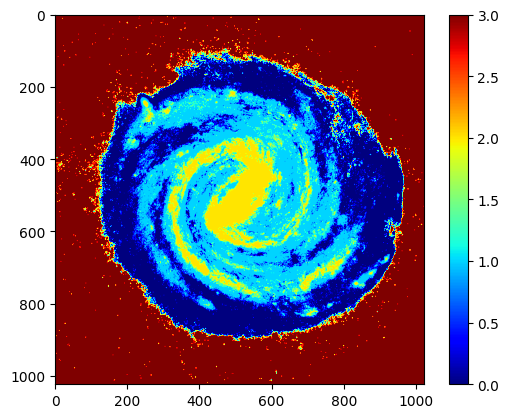

In [61]:
plt.imshow(result, cmap='jet')
plt.colorbar()
plt.show()

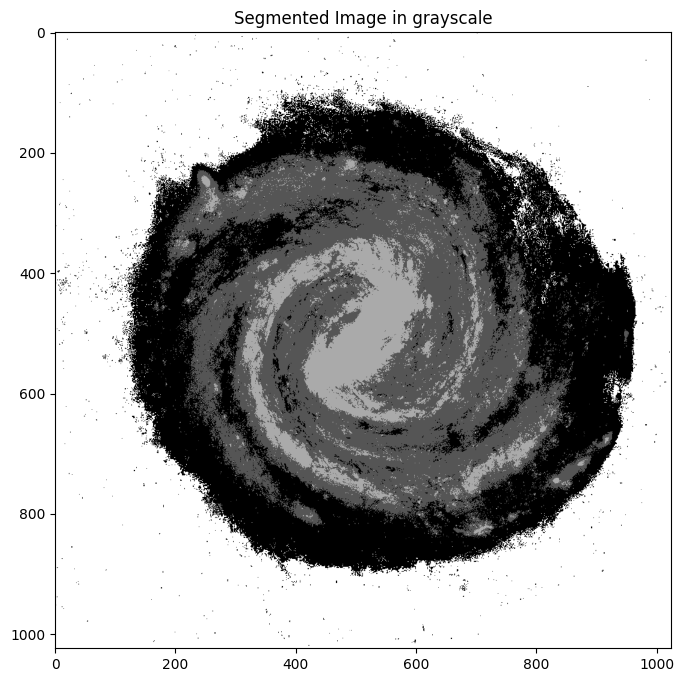

In [62]:
plt.figure(figsize=(8, 8))
plt.title('Segmented Image in grayscale')
plt.imshow(result, cmap='gray')
plt.show()

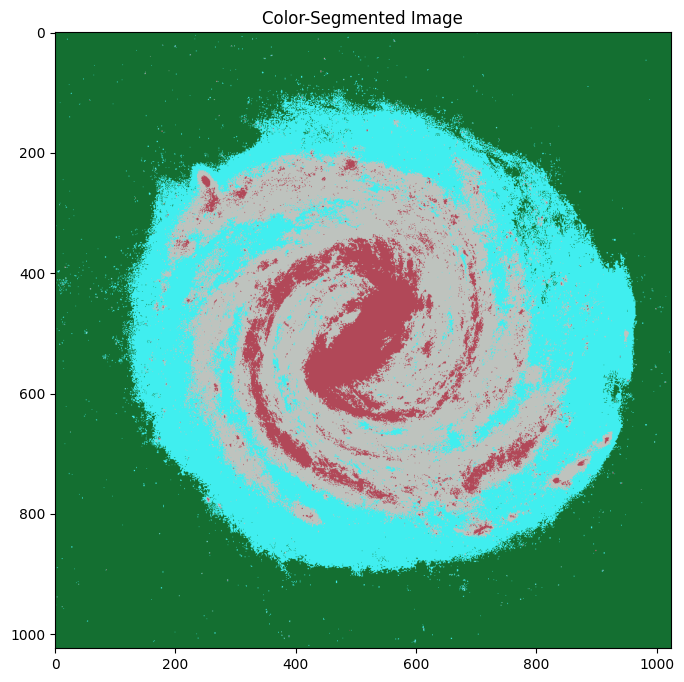

In [63]:
colored_segmented_img = np.zeros((img.shape[0], img.shape[1], 3))

# Assign colors to each cluster
for i in range(k):
    colored_segmented_img[result == i] = np.random.rand(3)

# Display the color-segmented image
plt.figure(figsize=(8, 8))
plt.title('Color-Segmented Image')
plt.imshow(colored_segmented_img)
plt.show()

In [64]:
# Save the segmented image
cv2.imwrite('/content/segmented_image_4.jpg', (colored_segmented_img * 255).astype(np.uint8))

True